In [74]:
get_ipython().magic('matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set_style('white')
sns.set_context('notebook')
from backward_selection import backward_selected
from forward_selection import forward_selected


data = pd.read_excel('caschool.xlsx.xls')

state=440232650+470353886+470352982 # sum of the student IDs for the members of the group

train = data.sample(frac=0.8, random_state=state) # For tasks 1-5 
test = data[data.index.isin(train.index)==False].copy() # Only for prediction (task 6)

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [75]:
cols = ['dist_cod', 'county','district',  'gr_span', 'enrl_tot', 'teachers', 'calw_pct', 'meal_pct', 'computer', 'testscr', 'comp_stu', 'expn_stu', 'str', 'avginc', 'el_pct', 'read_scr', 'math_scr']

In [76]:
model = backward_selected(train[cols], 'testscr')

adj_r2 if all variables included: nan
final model is testscr ~ avginc + str + meal_pct + county + comp_stu + computer + read_scr + gr_span + district + calw_pct + el_pct + expn_stu + math_scr + teachers + dist_cod + enrl_tot + 1, with adj_r2 of nan


In [77]:
f_model = forward_selected(train[cols], 'testscr')

you nominated variable(s) [u'read_scr', u'math_scr', u'district'], the adj_r2 is: 1.000000
Testing formula: testscr ~ read_scr + math_scr + district + avginc + 1
Testing formula: testscr ~ read_scr + math_scr + district + computer + 1
Testing formula: testscr ~ read_scr + math_scr + district + gr_span + 1
Testing formula: testscr ~ read_scr + math_scr + district + meal_pct + 1
Testing formula: testscr ~ read_scr + math_scr + district + calw_pct + 1
Testing formula: testscr ~ read_scr + math_scr + district + el_pct + 1
Testing formula: testscr ~ read_scr + math_scr + district + expn_stu + 1
Testing formula: testscr ~ read_scr + math_scr + district + county + 1
Testing formula: testscr ~ read_scr + math_scr + district + comp_stu + 1
Testing formula: testscr ~ read_scr + math_scr + district + dist_cod + 1
Testing formula: testscr ~ read_scr + math_scr + district + teachers + 1
Testing formula: testscr ~ read_scr + math_scr + district + str + 1
Testing formula: testscr ~ read_scr + math_sc

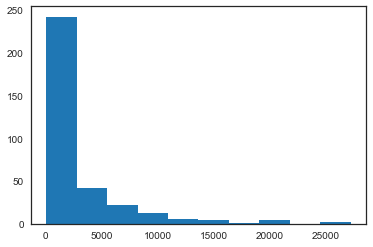

In [79]:
plt.hist(train['enrl_tot'])
plt.show()

In [83]:
train['enrl_tot'].quantile(.333);

In [84]:
 train['enrl_tot'].quantile(.666)

2277.9400000000005

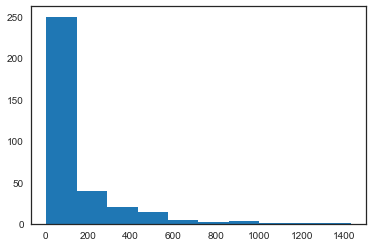

In [85]:
plt.hist(train['teachers'])
plt.show()

In [89]:
train['teachers'].quantile(.333)

26.428800067901612

In [90]:
train['teachers'].quantile(.666)

114.03300033569336

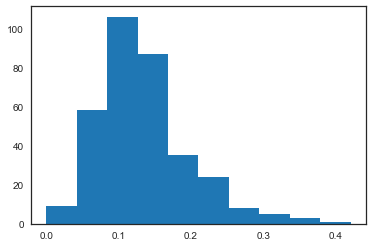

In [91]:
plt.hist(train['comp_stu'])
plt.show()

In [96]:
train['round_comp_stu'] = train['comp_stu'].round(1)
train['round_comp_stu'].head()

0    0.2
1    0.0
2    0.1
3    0.2
4    0.2
Name: round_comp_stu, dtype: float64

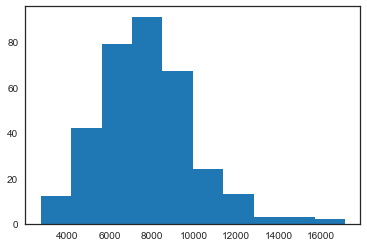

In [119]:
plt.hist(train['str']**)
plt.show()

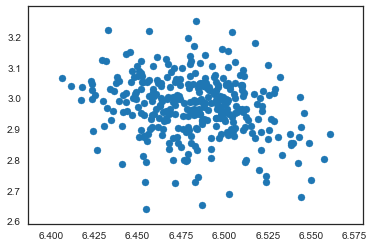

In [107]:
plt.scatter(train['testscr'].apply(np.log), train['str'].apply(np.log))
plt.show()

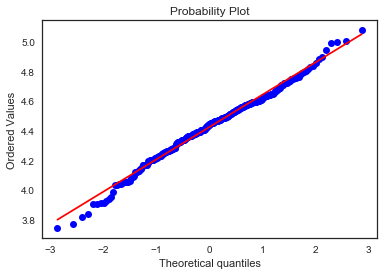

In [142]:
from scipy import stats
stats.probplot(train['str']**0.5, plot=plt)
plt.show()